In [1]:
import pandas as pd
import numpy as np
import joblib

# Load the datasets and scaler
NO3_train = pd.read_csv('preprocessed_datasets/NO3_train.csv')
NO3_val = pd.read_csv('preprocessed_datasets/NO3_val.csv')
NO3_test = pd.read_csv('preprocessed_datasets/NO3_test.csv')
NO3scaler = joblib.load('preprocessed_datasets/NO3scaler.pkl')

NO3_train.head()

,timestamp,consumption,temperature,time_of_day,time_of_week,time_of_year,lag_24_hours,lag_1_hour
0,2017-05-02 00:00:00+00:00,0.227701,0.450877,0.000000,0.166667,0.331507,0.246874,0.236276
1,2017-05-02 01:00:00+00:00,0.222187,0.450877,0.043478,0.166667,0.331507,0.248087,0.227701
2,2017-05-02 02:00:00+00:00,0.226947,0.443860,0.086957,0.166667,0.331507,0.248142,0.222187
3,2017-05-02 03:00:00+00:00,0.236823,0.431579,0.130435,0.166667,0.331507,0.250252,0.226947
4,2017-05-02 04:00:00+00:00,0.287226,0.426316,0.173913,0.166667,0.331507,0.268047,0.236823


In [2]:
# Splitting the datasets into features and targets and converting them into numpy arrays

NO3_train = NO3_train.drop('timestamp', axis=1)
NO3_val = NO3_val.drop('timestamp', axis=1)
NO3_test = NO3_test.drop('timestamp', axis=1)

# Separate features and targets for the training set
NO3_train_x = NO3_train.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_train_y = NO3_train['consumption'].to_numpy(dtype=np.float32)

# Separate features and targets for the validation set
NO3_val_x = NO3_val.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_val_y = NO3_val['consumption'].to_numpy(dtype=np.float32)

# Separate features and targets for the test set
NO3_test_x = NO3_test.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_test_y = NO3_test['consumption'].to_numpy(dtype=np.float32)

In [7]:
NO3_train_x.shape
NO3_train_x

array([[0.4508772 , 0.        , 0.16666667, 0.33150685, 0.24687432,
        0.23627639],
       [0.4508772 , 0.04347826, 0.16666667, 0.33150685, 0.2480866 ,
        0.22770137],
       [0.44385964, 0.08695652, 0.16666667, 0.33150685, 0.24814197,
        0.22218709],
       ...,
       [0.4280702 , 0.9130435 , 0.6666667 , 0.9972603 , 0.5991212 ,
        0.5514717 ],
       [0.42982456, 0.95652175, 0.6666667 , 0.9972603 , 0.5837774 ,
        0.5377186 ],
       [0.4280702 , 1.        , 0.6666667 , 0.9972603 , 0.55707616,
        0.52567935]], dtype=float32)

In [3]:
from models.RNN import RNN

model = RNN()  # Instantiate your model
history = model.fit(NO3_train_x,
                    NO3_train_y,
                    NO3_val_x,
                    NO3_val_y,
                    epochs=3)  # Train the model

model.evaluate(NO3_val_x, NO3_val_y)  # Validate the model

model.plot_history('models/RNN_NO3_3epochs_history.png')  # Visualize training and validation loss

model.save('models/RNN_NO3_3epochs.keras')  # Save the model


Epoch 1/3


c:\Users\maxgu\Projects\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 6), dtype=float32). Expected shape (None, 1, 6), but input has incompatible shape (None, 6)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
  • training=True
  • mask=None

## Feed-forward neural network

Epoch 1/300


c:\Users\maxgu\Projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - loss: 0.0347 - val_loss: 0.0039
Epoch 2/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 3/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - loss: 0.0012 - val_loss: 8.8873e-04
Epoch 5/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - loss: 9.8905e-04 - val_loss: 7.4884e-04
Epoch 6/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - loss: 8.4757e-04 - val_loss: 6.9787e-04
Epoch 7/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - loss: 7.6973e-04 - val_loss: 6.6932e-04
Epoch 8/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - loss: 7.0386e-04 - val_loss: 5.9608e-04
Epoch 9/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - loss: 6.5512e-04 - val_loss: 5.6588e-04
Epoch 10/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - loss: 6.1154e-04 - val_loss: 5.3992e-04
Epoch 11/300
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 47

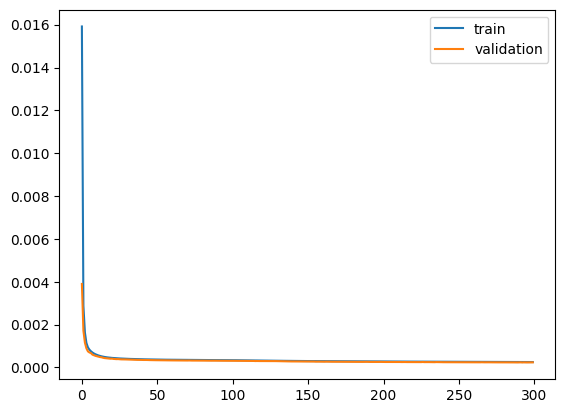

In [ ]:
from models.feedForwardNN import feedForwardNN

model = feedForwardNN()  # Instantiate your model
history = model.fit(NO3_train_x,
                    NO3_train_y,
                    NO3_val_x,
                    NO3_val_y,
                    epochs=3)  # Train the model

model.evaluate(NO3_val_x, NO3_val_y)  # Validate the model

model.plot_history('models/FF_NO3_3epochs_history.png')  # Visualize training and validation loss

model.save('models/FF_NO3_3epochs.keras')  # Save the model



In [ ]:
from keras.models import load_model

# Load the model
model = load_model('models/FF_NO3_300epochs.keras')

C:\Users\maxgu\AppData\Local\Temp\ipykernel_14572\422223283.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_x_copy[i+1, -1] = prediction


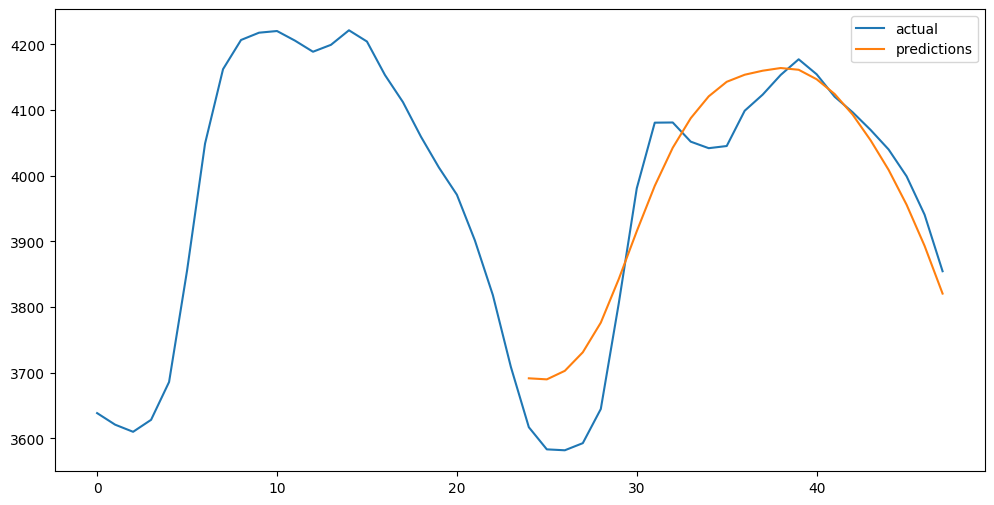

In [ ]:
import matplotlib.pyplot as plt

def predict_and_update(model, test_x, test_y, start=24, end=48, scaler=NO3scaler):
    test_x_copy = test_x[start-24:end].copy()
    test_y_copy = test_y[start-24:end].copy()
    test_x_copy[start + 1:, -1] = 0
    predictions = []
    for i in range(24, len(test_y_copy)):
        prediction = model.predict(test_x_copy[i].reshape(1, -1), verbose=0)
        predictions.append(prediction[0][0])
        if i < len(test_x_copy)-1:
            test_x_copy[i+1, -1] = prediction
    
    # Rescale the data to original values
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)
    test_y_copy = scaler.inverse_transform(test_y_copy.reshape(-1, 1)).reshape(-1)

    plt.figure(figsize=(12, 6))
    plt.plot(test_y_copy, label='actual')
    plt.plot(range(24, len(test_y_copy)), predictions, label='predictions') 
    plt.legend()
    plt.show()

# test the function
predict_and_update(model, NO3_test_x, NO3_test_y)